# Swarm plot — stats and validation

This notebook demonstrates the swarm plot algorithm from raw CSV to Plotly figure, plus a **TSV report** summarizing what was plotted. Uses `swarm_stats.py` (self-contained, no group_plot) and `FigureGenerator._figure_swarm()` for side-by-side validation.

Pipeline:
1. **Load CSV** and set plot parameters (pre_filter, group_col, ycol, color_grouping).
2. **Pre-filter** the master dataframe.
3. **Plot**: Call `_figure_swarm()` to produce the Plotly swarm plot.
4. **Stats**: Call `swarm_report_from_state()` to produce a TSV report (parameters + stats table + ragged values).
5. **Validate**: Compare that our stats match the points shown in the plot.

## Setup

Imports and path to data. Run from **nicewidgets project root** (the directory containing `data/` and `notebooks/`).

In [1]:
import sys
from pathlib import Path

import pandas as pd
import plotly.graph_objects as go

# Ensure nicewidgets is importable (run from nicewidgets project root)
_root = Path.cwd()
if (_root / "notebooks").exists():
    pass  # cwd is project root
elif (_root.parent / "notebooks").exists():
    _root = _root.parent  # cwd is notebooks/
_src = _root / "src"
if _src.exists() and str(_src) not in sys.path:
    sys.path.insert(0, str(_src))

from nicewidgets.plot_pool_widget.algorithms.swarm_stats import swarm_report_from_state, PRE_FILTER_NONE
from nicewidgets.plot_pool_widget.dataframe_processor import DataFrameProcessor
from nicewidgets.plot_pool_widget.figure_generator import FigureGenerator
from nicewidgets.plot_pool_widget.plot_state import PlotState, PlotType

# Path to data
DATA_DIR = _root / "data" if (_root / "data").exists() else _root / "../data"
CSV_PATH = DATA_DIR / "kym_event_report.csv"
assert CSV_PATH.exists(), f"Example CSV not found: {CSV_PATH}"

## Parameters (plot state)

Edit plot params here — same as in the GUI. All downstream cells use this state.

In [2]:
# Edit plot params here — same as in the GUI
state = PlotState(
    pre_filter={"roi_id": PRE_FILTER_NONE},
    xcol="grandparent_folder",
    ycol="score_peak",
    plot_type=PlotType.SWARM,
    group_col="event_type",
    color_grouping=None,
    use_absolute_value=False,
    use_remove_values=False,
    remove_values_threshold=None,
    cv_epsilon=1e-10,
)
UNIQUE_ROW_ID_COL = "kym_event_id"

## Load and filter data

In [3]:
df_master = pd.read_csv(CSV_PATH)
pre_filter_columns = list(state.pre_filter.keys())
data_processor = DataFrameProcessor(
    df_master,
    pre_filter_columns=pre_filter_columns,
    unique_row_id_col=UNIQUE_ROW_ID_COL,
)
df_f = data_processor.filter_by_pre_filters(state.pre_filter)
print(f"Filtered rows: {len(df_f)}")

Filtered rows: 116


## Plot: call _figure_swarm

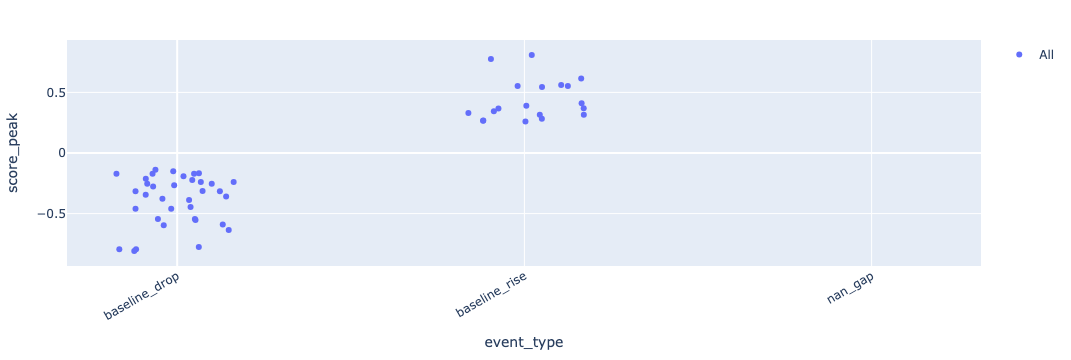

In [4]:
figure_generator = FigureGenerator(data_processor, unique_row_id_col=UNIQUE_ROW_ID_COL)
fig_dict = figure_generator._figure_swarm(df_f, state)
fig = go.Figure(fig_dict)
fig.show()

## Stats: TSV report (swarm_stats)

In [5]:
report = swarm_report_from_state(
    df_master, state, unique_row_id_col=UNIQUE_ROW_ID_COL
)
print(report)

# Parameters
pre_filter	{'roi_id': '(none)'}
group_col	event_type
ycol	score_peak
color_grouping	(none)

# Stats (one row per group)
	event_type	count	min	max	mean	median	std	sem	cv
0	baseline_drop	35	-0.808	-0.138	-0.3867428571428571	-0.316	0.20442967190773098	0.034554921401114706	-0.528593271038016
1	baseline_rise	19	0.26	0.808	0.43831578947368416	0.369	0.16857607996641186	0.03867400509851688	0.3845996060713047


# Values (ragged, one col per group)
baseline_drop	baseline_rise
-0.595	0.614
-0.794	0.56
-0.808	0.808
-0.775	0.775
-0.794	0.553
-0.635	0.545
-0.589	0.553
-0.545	0.411
-0.545	0.268
-0.553	0.26
-0.172	0.266
-0.168	0.344
-0.191	0.283
-0.459	0.316
-0.459	0.39
-0.172	0.367
-0.24	0.369
-0.316	0.33
-0.277	0.316
-0.253	
-0.266	
-0.254	
-0.377	
-0.358	
-0.316	
-0.388	
-0.445	
-0.313	
-0.345	
-0.138	
-0.212	
-0.171	
-0.15	
-0.24	
-0.223	



## Example with color_grouping

Uses the same kym event CSV with `group_col=grandparent_folder` (x-axis / condition) and `color_grouping=roi_id` (nesting within each group).

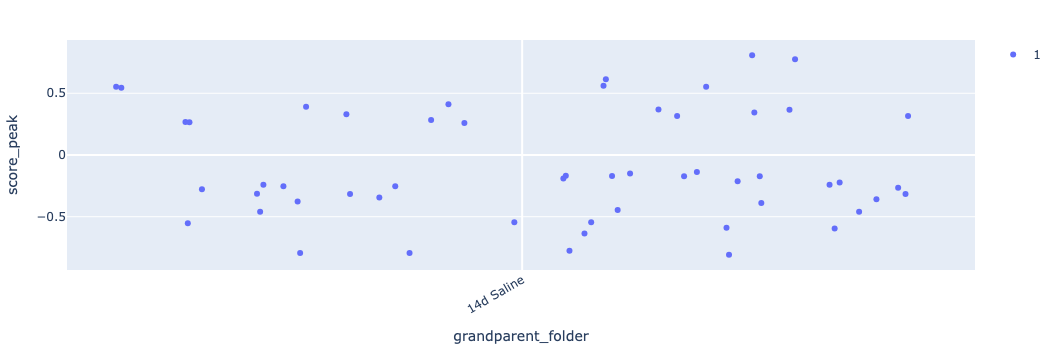

In [6]:
# Uses same kym event CSV (df_master) with grandparent_folder and roi_id
state2 = PlotState(
    pre_filter={"roi_id": PRE_FILTER_NONE},
    xcol="grandparent_folder",
    ycol="score_peak",
    plot_type=PlotType.SWARM,
    group_col="grandparent_folder",
    color_grouping="roi_id",
)
gen2 = FigureGenerator(data_processor, unique_row_id_col=UNIQUE_ROW_ID_COL)
fig2 = go.Figure(gen2._figure_swarm(df_f, state2))
fig2.show()

In [19]:
report2 = swarm_report_from_state(
    df_master, state2, unique_row_id_col=UNIQUE_ROW_ID_COL
)
print(report2)

# Parameters
pre_filter	{'roi_id': '(none)'}
group_col	grandparent_folder
ycol	vel_mean
color_grouping	roi_id

# Stats (one row per group)
group_key	count	min	max	mean	median	std	sem	cv
14d Saline_1	59	-2.1961055374617646	3.1077639640334658	0.7048817662509803	0.7426893014164203	1.1855944974370292	0.154351256486184	1.6819764025714437
14d Saline_2	59	-5870810.5	2.95388715553494	-368617.1902407241	0.5132601481391026	1186122.135832773	154419.94915431758	-3.2177613178001283
28d AngII + Recovery_1	94	-1.5165309509365716	3.320518262613074	0.5087166823579891	0.4905520059585934	0.9809485680452797	0.10117711945690412	1.9282807151092725
28d AngII + Recovery_2	94	-7822809.298715664	3.3099216523829016	-324477.6973338585	0.3819040060435803	1071686.4365959803	110536.01600324715	-3.3028046161622964
28d AngII_1	62	-2.2964231587626	2.44348356702993	0.011142444971460384	-0.2536766133121372	0.9801704552590684	0.12448177229973624	87.96726910203465
28d AngII_2	62	-3725404.094427578	1.5413058551611167	-24719